## Supplement 7: Unsupervised Learning

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import skimage
import matplotlib.pyplot as plt

### 7.3 Programming Task: Color Quantization using K-Means clustering.

 The goal of this task is to perform color quantization using the K-Means clustering algorithm.

   i\. Implement the K-Means clustering algorithm using Numpy/SciPy.




In [60]:
def K_means_clustering(train_X, k, min_delta=1, max_iter=10):
   cluster_centers = train_X[np.random.choice(train_X.shape[0], k, replace=False)]
   for i in range(max_iter):
         # Assign each pixel to the nearest cluster center
         distances = np.array([np.linalg.norm(train_X - cluster_center, axis=1) for cluster_center in cluster_centers])
         cluster_assignments = np.argmin(distances, axis=0)
         # Update the cluster centers
         new_cluster_centers = np.array([train_X[cluster_assignments == i].mean(0) if np.sum(cluster_assignments == i) > 0 else cluster_centers[i] for i in range(k)])
         if np.all(np.linalg.norm(new_cluster_centers - cluster_centers, axis=1) < min_delta):
              break
         cluster_centers = new_cluster_centers
   return cluster_centers

   ii\. Read the given image. Consider each pixel as a 3-dimensional vector and run your K-Means clustering algorithm to get 64 clusters.


In [76]:
# Read the image
image = skimage.io.imread('sup_7_3_input.jpg')

data = image.reshape(-1, 3) 
k = 64
cluster_centers = K_means_clustering(data, k, max_iter=10)

cluster_centers_int = cluster_centers.astype(int).clip(0, 255)
cluster_centers_int

array([[ 25,  35,  22],
       [218,  96,  11],
       [ 77,  54,  38],
       [125,  22,   7],
       [ 29,  32,  21],
       [ 20,  22,  13],
       [ 20,  22,  16],
       [ 74,  73,  68],
       [175, 195,  52],
       [222, 179, 159],
       [ 27,  36,  30],
       [100, 107, 137],
       [ 28,  33,  17],
       [157, 111,  92],
       [144,  95,  70],
       [ 52,  83,  26],
       [ 69,  77, 129],
       [167,  72,  21],
       [101,  62,  40],
       [192,  54,   7],
       [ 22,  34,  19],
       [139,  50,  15],
       [ 13,  17,  10],
       [ 27,  64,  16],
       [ 26,  29,  16],
       [ 39,  60,  31],
       [168, 118,  21],
       [ 78, 107,  31],
       [ 28,  39,  22],
       [ 23,  31,  22],
       [ 53,  53,  14],
       [ 66,  25,  17],
       [ 34,  35,  23],
       [167,  34,   7],
       [ 33,  32,  64],
       [ 96,  30,  16],
       [ 38,  13,  13],
       [114,  72,  51],
       [ 32,  47,  28],
       [131, 156,  95],
       [ 21,  12,  20],
       [ 46,  28

  iii\. Assign each pixel the color value of its nearest cluster center. Visualize the result.

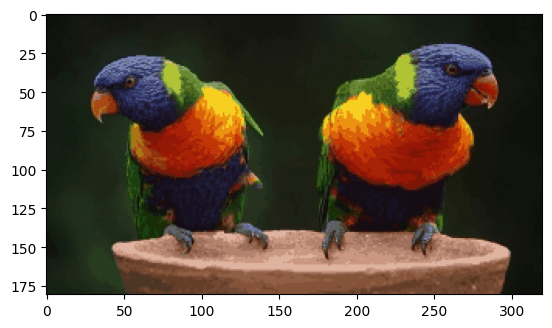

In [92]:
new_data = cluster_centers_int[np.argmin(np.linalg.norm(data[:, None] - cluster_centers, axis=2), axis=1)]
new_image = new_data.reshape(image.shape).astype(np.uint8)

plt.imshow(new_image)
plt.show()
